In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
files.upload()

Saving Brain_hemorrhage.zip to Brain_hemorrhage.zip


In [9]:
!unzip /content/Brain_hemorrhage.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_83.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_84.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_85.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_86.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_87.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_88.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_89.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_9.jpg  
  inflating: Data/Hemorrhagic/KANAMA/3[3]/ventrik├╝ler-parankimal kanama_0_90.jpg  
  inflating: Data/Hemorrhagic/KANAMA/4[4]/4_0_10.jpg  
  inflating: Data/Hemorrhagic/KANAMA/4[4]/4_0_100.jpg  
  inflating: Data/Hemorrhagic/KANAMA/4[4]/4_0_101.jpg  
  inflating: Data/Hemorrhag

In [24]:
import os
import os.path
from pathlib import Path
import glob

In [10]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [17]:
import tensorflow as tf


In [20]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19

ImportError: ignored

In [25]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [26]:
Brain_CT_Path = Path("/content/Data")

In [27]:
JPG_Path = list(Brain_CT_Path.glob(r"**/*.jpg"))

In [28]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

In [30]:
import pandas as pd

In [31]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [32]:
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

In [33]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [34]:
print(Main_Data.head(-1))

                                                    JPG  CATEGORY
0      /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_66.jpg      1[1]
1     /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_192.jpg      1[1]
2     /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_205.jpg      1[1]
3      /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_85.jpg      1[1]
4     /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_221.jpg      1[1]
...                                                 ...       ...
6766        /content/Data/NORMAL/N19[N19]/N19_0_111.jpg  N19[N19]
6767         /content/Data/NORMAL/N19[N19]/N19_0_94.jpg  N19[N19]
6768         /content/Data/NORMAL/N19[N19]/N19_0_31.jpg  N19[N19]
6769         /content/Data/NORMAL/N19[N19]/N19_0_66.jpg  N19[N19]
6770         /content/Data/NORMAL/N19[N19]/N19_0_62.jpg  N19[N19]

[6771 rows x 2 columns]


In [35]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [36]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

In [37]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0      /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_66.jpg  Hemorrhage
1     /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_192.jpg  Hemorrhage
2     /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_205.jpg  Hemorrhage
3      /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_85.jpg  Hemorrhage
4     /content/Data/Hemorrhagic/KANAMA/1[1]/1_0_221.jpg  Hemorrhage
...                                                 ...         ...
6766        /content/Data/NORMAL/N19[N19]/N19_0_111.jpg      Normal
6767         /content/Data/NORMAL/N19[N19]/N19_0_94.jpg      Normal
6768         /content/Data/NORMAL/N19[N19]/N19_0_31.jpg      Normal
6769         /content/Data/NORMAL/N19[N19]/N19_0_66.jpg      Normal
6770         /content/Data/NORMAL/N19[N19]/N19_0_62.jpg      Normal

[6771 rows x 2 columns]


In [38]:
print(Main_Data["CATEGORY"].value_counts())

Normal        4105
Hemorrhage    2667
Name: CATEGORY, dtype: int64


In [39]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

In [40]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0           /content/Data/NORMAL/N10[N10]/N10_0_122.jpg      Normal
1     /content/Data/Hemorrhagic/KANAMA/12[12]/12_0_1...  Hemorrhage
2     /content/Data/Hemorrhagic/KANAMA/13[13]/17_0_2...  Hemorrhage
3           /content/Data/NORMAL/N20[N20]/N20_0_147.jpg      Normal
4     /content/Data/Hemorrhagic/KANAMA/15[15]/IMG-00...  Hemorrhage
...                                                 ...         ...
6766         /content/Data/NORMAL/N27[N27]/N27_0_82.jpg      Normal
6767  /content/Data/Hemorrhagic/KANAMA/14[14]/14_0_1...  Hemorrhage
6768         /content/Data/NORMAL/N24[N24]/N24_0_18.jpg      Normal
6769  /content/Data/Hemorrhagic/KANAMA/13[13]/17_0_1...  Hemorrhage
6770            /content/Data/NORMAL/N8[N8]/N8_0_46.jpg      Normal

[6771 rows x 2 columns]


In [42]:
import matplotlib.pyplot as plt 

In [43]:
plt.style.use('dark_background')

In [45]:
import seaborn as sns

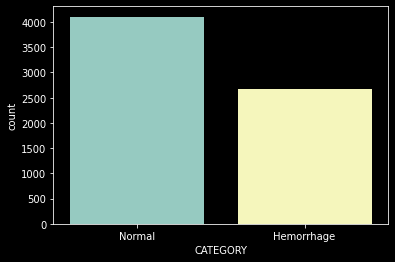

In [46]:
sns.countplot(Main_Data["CATEGORY"])
plt.show()

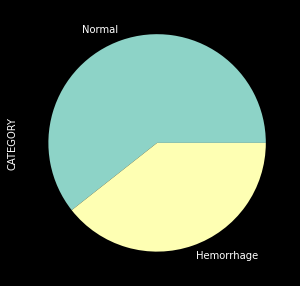

In [47]:
Main_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

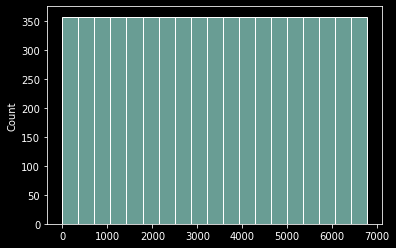

In [48]:
sns.histplot(Main_Data['CATEGORY'].index)
plt.show()

Text(0.5, 1.0, 'Normal')

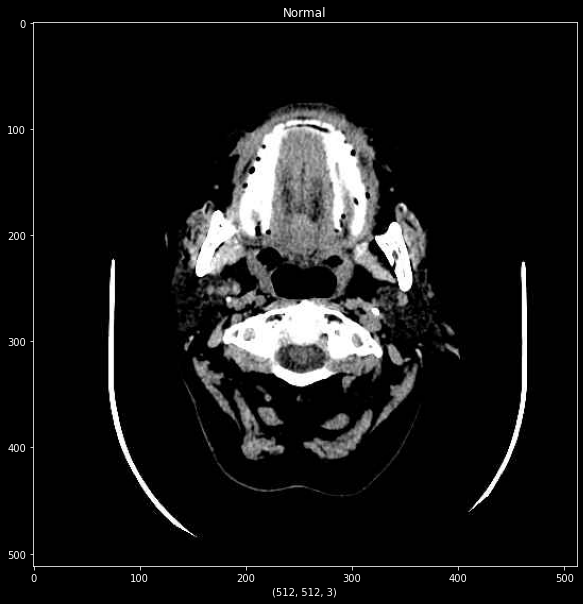

In [49]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][0])

Text(0.5, 1.0, 'Hemorrhage')

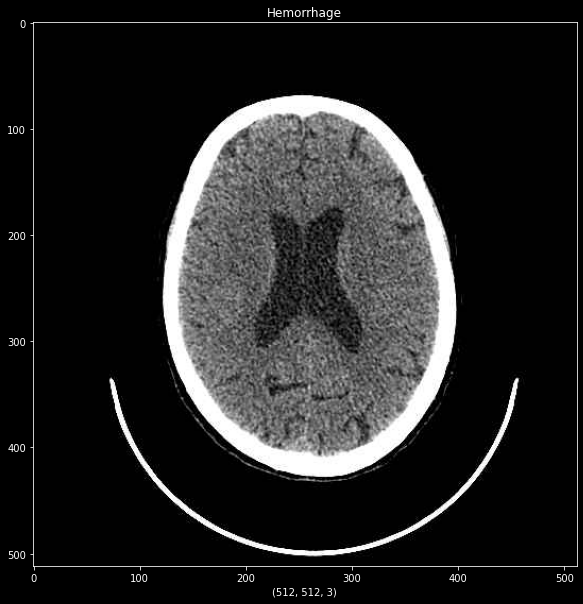

In [50]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][25])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][6769])

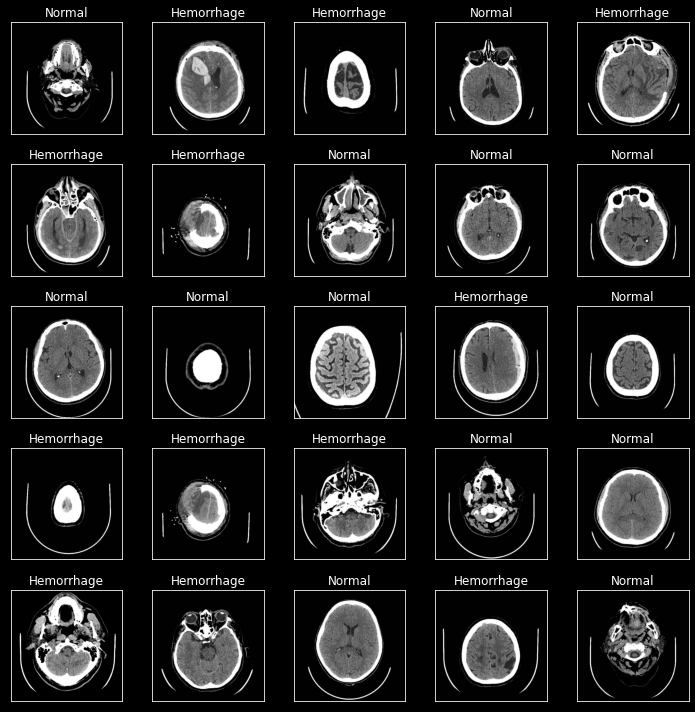

In [51]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [52]:
Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,shuffle=True,random_state=42)

In [53]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (6094, 2)
TEST SHAPE:  (678, 2)


In [54]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                    JPG    CATEGORY
318         /content/Data/NORMAL/N22[N22]/N22_0_151.jpg      Normal
4941  /content/Data/Hemorrhagic/KANAMA/13[13]/17_0_1...  Hemorrhage
4251            /content/Data/NORMAL/N8[N8]/N8_0_13.jpg      Normal
5787   /content/Data/Hemorrhagic/KANAMA/4[4]/4_0_96.jpg  Hemorrhage
4999           /content/Data/NORMAL/N3[N3]/N3_0_137.jpg      Normal
...                                                 ...         ...
3092           /content/Data/NORMAL/N3[N3]/N3_0_180.jpg      Normal
3772         /content/Data/NORMAL/N27[N27]/N27_0_61.jpg      Normal
5191         /content/Data/NORMAL/N17[N17]/N17_0_23.jpg      Normal
5226           /content/Data/NORMAL/N5[N5]/N5_0_107.jpg      Normal
5390         /content/Data/NORMAL/N22[N22]/N22_0_34.jpg      Normal

[6093 rows x 2 columns]
--------------------------------------------------------------------------------
                                                    JPG    CATEGORY
2689  /con

In [55]:
Generator = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True,
                               fill_mode="nearest",
                              validation_split=0.1)

In [56]:
Test_Generator = ImageDataGenerator(rescale=1./255)

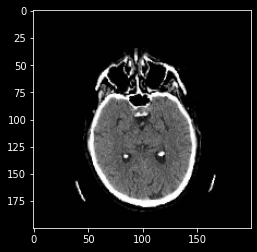

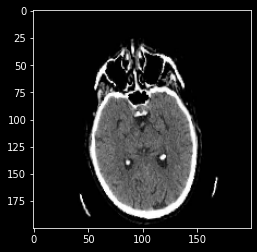

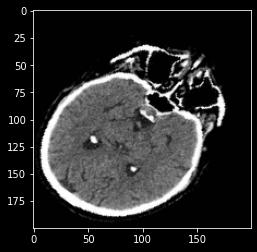

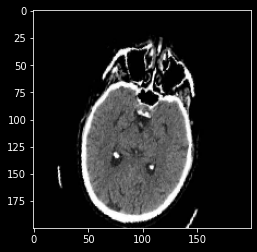

In [57]:
example_Image = Train_Data["JPG"][99]
Load_Image = image.load_img(example_Image,target_size=(200,200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [58]:
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="grayscale",
                                             class_mode="categorical",
                                             subset="training")


Found 5485 validated image filenames belonging to 2 classes.


In [59]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                                  x_col="JPG",
                                                  y_col="CATEGORY",
                                                  color_mode="grayscale",
                                                  class_mode="categorical",
                                                  subset="validation")

Found 609 validated image filenames belonging to 2 classes.


In [60]:
Test_IMG_Set = Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 color_mode="grayscale",
                                                 class_mode="categorical")

Found 678 validated image filenames belonging to 2 classes.


In [61]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [62]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [63]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")

TRAIN: 
{'Hemorrhage': 0, 'Normal': 1}
[0, 1, 0, 1, 1]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 0, 1, 0, 1]
(256, 256, 1)
------------------------------------------------------------
TEST: 


In [64]:
print(Test_IMG_Set.batch_size)
print(Test_IMG_Set.image_shape)

32
(256, 256, 1)


In [65]:
Model = Sequential()

Model.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(256,256,1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(2,activation="softmax"))

In [66]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [67]:
Model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [69]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                      epochs=20)

Epoch 1/20
172/172 [==============================] - 477s 3s/step - loss: 0.6725 - accuracy: 0.5909 - val_loss: 0.6702 - val_accuracy: 0.6043
Epoch 2/20
172/172 [==============================] - 477s 3s/step - loss: 0.6597 - accuracy: 0.6166 - val_loss: 0.6418 - val_accuracy: 0.6371
Epoch 3/20
172/172 [==============================] - 477s 3s/step - loss: 0.6184 - accuracy: 0.6616 - val_loss: 0.6384 - val_accuracy: 0.6502
Epoch 4/20
172/172 [==============================] - 477s 3s/step - loss: 0.6056 - accuracy: 0.6675 - val_loss: 0.5778 - val_accuracy: 0.6765
Epoch 5/20
172/172 [==============================] - 477s 3s/step - loss: 0.5976 - accuracy: 0.6735 - val_loss: 0.6046 - val_accuracy: 0.6535
Epoch 6/20
172/172 [==============================] - 478s 3s/step - loss: 0.6140 - accuracy: 0.6727 - val_loss: 0.5772 - val_accuracy: 0.6700
Epoch 7/20
172/172 [==============================] - 476s 3s/step - loss: 0.6316 - accuracy: 0.6757 - val_loss: 0.5672 - val_accuracy: 0.6946

In [70]:
Model_Results = Model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.4578
ACCURACY:  0.78


In [71]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 12)      120       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 12)      48        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 12)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 24)      2616      
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 24)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        1

No handles with labels found to put in legend.


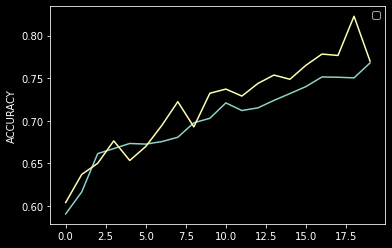

In [72]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


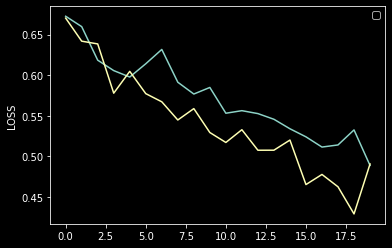

In [73]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

No handles with labels found to put in legend.


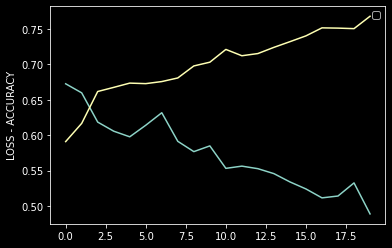

In [74]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["accuracy"])
plt.ylabel("LOSS - ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


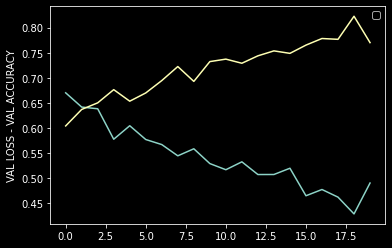

In [75]:
plt.plot(CNN_Model.history["val_loss"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("VAL LOSS - VAL ACCURACY")
plt.legend()
plt.show()

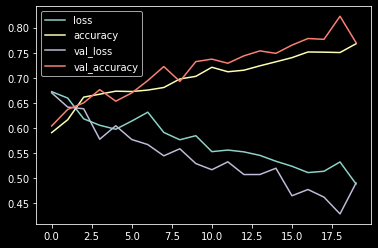

In [76]:
Dict_Summary = pd.DataFrame(CNN_Model.history)
Dict_Summary.plot()

In [77]:
Prediction = Model.predict(Test_IMG_Set)
Prediction = Prediction.argmax(axis=-1)

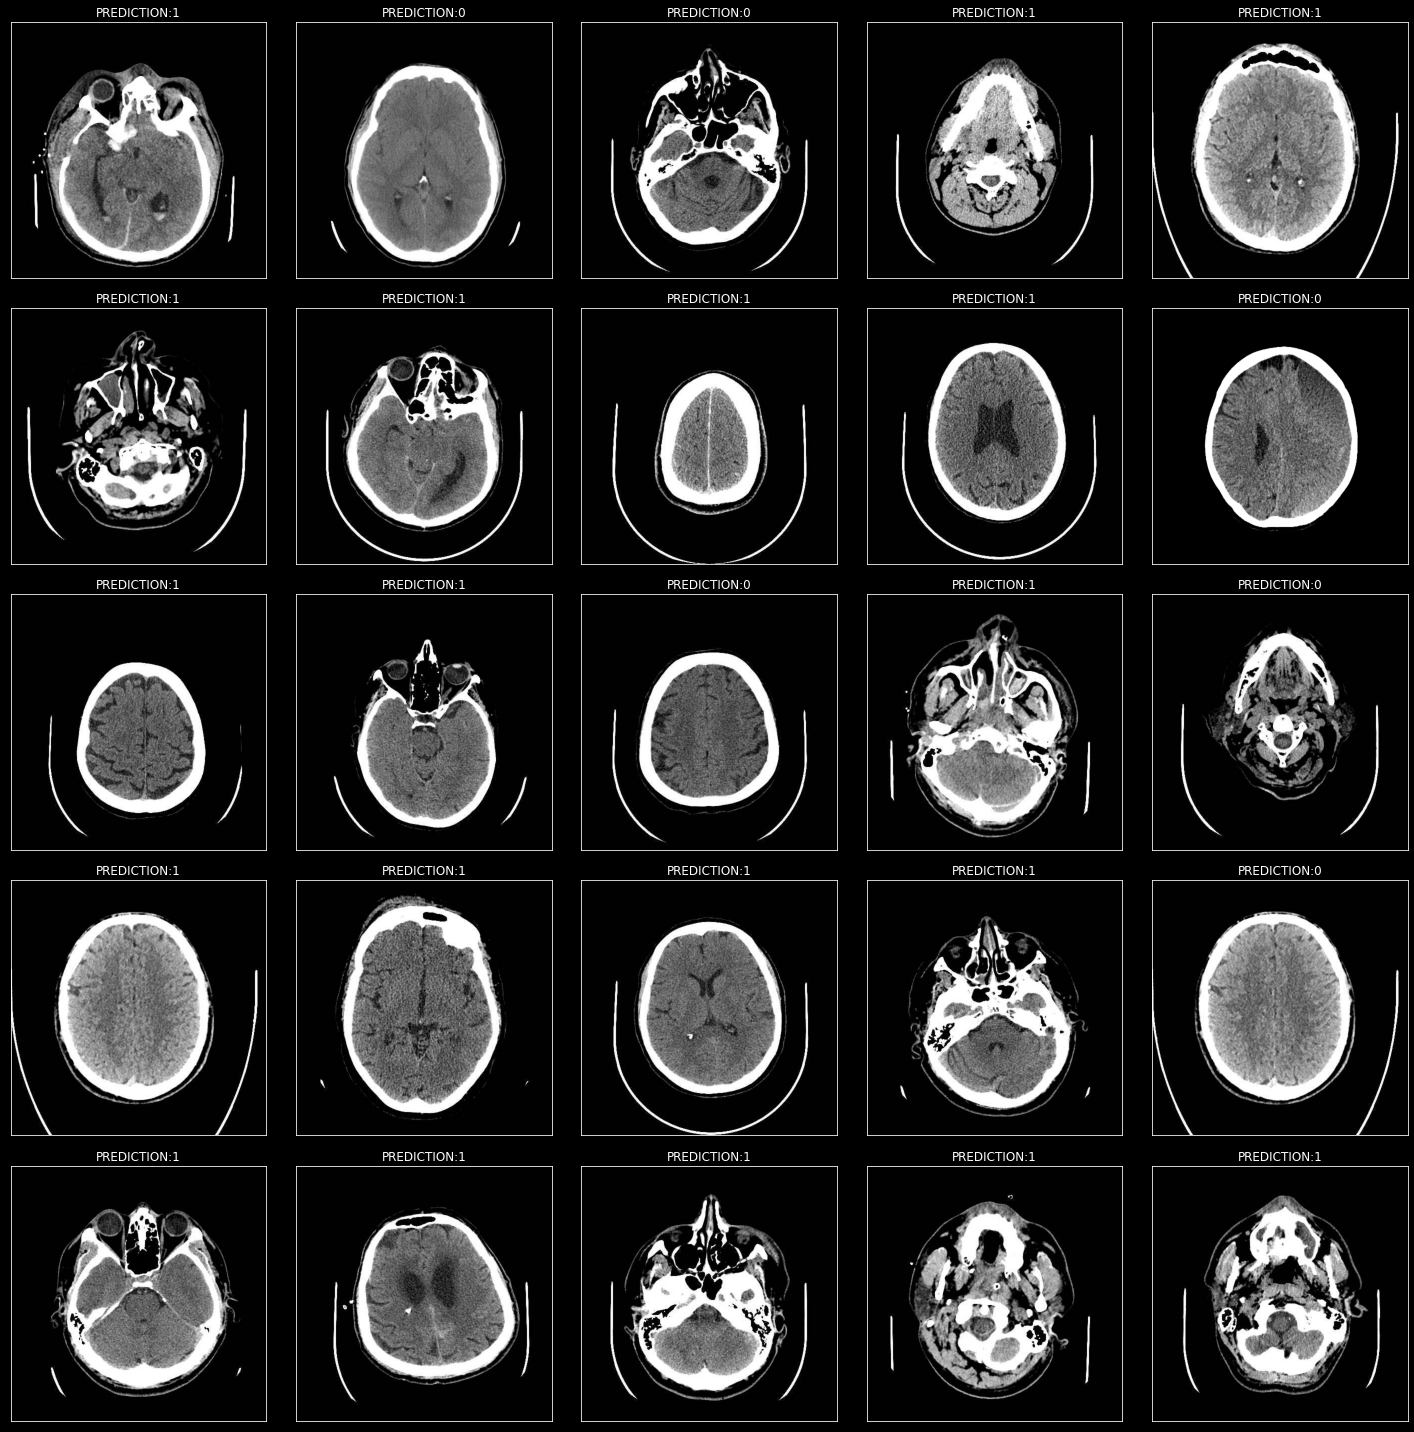

In [78]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Prediction[i]}")
plt.tight_layout()
plt.show()